In [54]:
#michael is sus

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat

In [55]:
company_tweet = pd.read_csv('Data/Tweets/Company_Tweet.csv')
tweet = pd.read_csv('Data/Tweets/Tweet.csv')
company = pd.read_csv('Data/Tweets/Company.csv')
company_value = pd.read_csv('Data/CompanyStocks/CompanyValues.csv')

In [56]:
tweet = tweet.dropna()
#merge company tweets and tweets on id
tweet_df = pd.merge(company_tweet , tweet , on="tweet_id", how= "inner")

In [57]:
#create variable 'total_engagement'
tweet_df["total_engangement"] = tweet_df["comment_num"] + tweet_df["retweet_num"] + tweet_df["like_num"]
#remove tweets below certain engagement
engagement_threshold = 40
tweet_df = tweet_df[tweet_df["total_engangement"] > engagement_threshold]
tweet_df.head()
print('tweet count: ', tweet_df.size)

tweet count:  485118


In [58]:
#convert original time on tweet_df to date time
tweet_df['post_date'] = pd.to_datetime(tweet_df['post_date'], unit='s')
tweet_df['day_date'] = pd.to_datetime(tweet_df['post_date'].apply(lambda date: date.date()))

In [59]:
#order chronilogically
tweet_df = tweet_df.sort_values(by="day_date")

In [60]:
#convert time value on company stock data to date time
stock_df = company_value
stock_df['day_date']  = pd.to_datetime(stock_df['day_date'])
stock_df.sample(5)


,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
15785,TSLA,2015-02-27,203.34,3871397,206.90,208.55,202.80
15669,TSLA,2015-08-13,242.51,4683330,239.86,246.48,239.12
2782,AAPL,2017-04-30,143.65,20783460,144.09,144.30,143.27
9077,GOOGL,2018-06-09,1132.71,1363479,1131.21,1138.78,1123.23
16960,TSLA,2015-01-01,222.41,2392947,223.09,225.68,222.25


In [61]:
#drop un-needed features
tweet_df = tweet_df.drop(['tweet_id', 'post_date', 'comment_num', 'retweet_num', 'like_num'], axis=1)

In [62]:
#remove any stock data that is outside of the tweet data
start_day = min(tweet_df['day_date'])
print(f"Start day: {start_day}")

end_day = max(tweet_df['day_date'])
print(f"End day: {end_day}")

Start day: 2015-01-01 00:00:00
End day: 2019-12-31 00:00:00


In [63]:
stock_df = stock_df[(stock_df['day_date'] >= start_day) & (stock_df['day_date'] <= end_day)]

In [64]:
#sort stock data chronilogically
stock_df = stock_df.sort_values(by="day_date")
stock_df.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
2517,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21
10810,GOOG,2015-01-01,526.40,1367110,531.25,532.60,525.80
8687,GOOGL,2015-01-01,530.66,1235889,537.74,538.40,530.20
16960,TSLA,2015-01-01,222.41,2392947,223.09,225.68,222.25
5602,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.01


In [65]:
tweet_df.head()

,ticker_symbol,writer,body,total_engangement,day_date
40,AAPL,CNBC,This is Wall Street's top pick in 2015. Hint: ...,64,2015-01-01
47,AAPL,WSJ,"See how tech companies like Apple, Twitter and...",347,2015-01-01
239,AAPL,greatspoke,Top Stock Analyst Releases Report on Top Stock...,433,2015-01-01
240,AAPL,greatspoke,Analyst Report on Top Stock Market Options for...,433,2015-01-01
241,AMZN,greatspoke,Analyst Report on Top Stock Market Options for...,433,2015-01-01


In [66]:
APPL_df = stock_df.loc[stock_df['ticker_symbol'] == 'AAPL']

GOOG_df = stock_df.loc[stock_df['ticker_symbol'] == 'GOOG']
GOOGL_df = stock_df.loc[stock_df['ticker_symbol'] == 'GOOGL']


TSLA_df = stock_df.loc[stock_df['ticker_symbol'] == 'TSLA']
AMZN_df = stock_df.loc[stock_df['ticker_symbol'] == 'AMZN']
MSFT_df = stock_df.loc[stock_df['ticker_symbol'] == 'MSFT']

In [67]:
#there are two types of google stocks, one has voting power in the company while the other doesnt
GOOGL_df.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
8687,GOOGL,2015-01-01,530.66,1235889,537.74,538.4000,530.20
7530,GOOGL,2015-01-02,529.55,1325271,532.60,535.8000,527.88
8688,GOOGL,2015-01-03,529.55,1325271,532.60,535.8000,527.88
8689,GOOGL,2015-01-04,529.55,1325271,532.60,535.8000,527.88
7529,GOOGL,2015-01-05,519.46,2054120,527.15,527.9899,517.75


In [68]:
APPL_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'AAPL']

In [69]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [70]:
import nltk                             
# from nltk.corpus import twitter_samples                            
# from nltk.corpus import stopwords 
# from nltk.stem import PorterStemmer
# from nltk.tokenize import TweetTokenizer  

import random  
import re                     
import string


In [71]:
def remove_special_character(tweet):
#     print(tweet)
    # remove the old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags. only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    # remove single numeric terms in the tweet. 
    tweet = re.sub(r'[0-9]', '', tweet)
    
    return tweet

In [72]:
tweet_df["body"] = tweet_df["body"].apply(lambda tweet: remove_special_character(tweet))
tweet_df["body"] = tweet_df["body"].str.lower()
tweet_df.sample(5)

# ?? why is the body text so fucked up ??

,ticker_symbol,writer,body,total_engangement,day_date
4016692,TSLA,ValueExpected,spoke to leasing manager of a mall with a $tsl...,98,2019-03-07
3938083,TSLA,vincent13031925,"wow this is insane!! tesla model in oslo, nor...",313,2018-12-12
4201882,TSLA,ElonsWorld,new tesla model y wiring system is revolutiona...,86,2019-09-30
3895646,TSLA,ValueAnalyst1,audi's hell before production hell.$tsla tesla...,73,2018-10-21
334811,AAPL,DayTradersGroup,oecd cuts growth forecasts as it pushes for ra...,47,2015-09-16


In [73]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [74]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vanderSentimentAnalyzer = SentimentIntensityAnalyzer()

In [75]:
def getVanderScore(tweet):    
    vs = vanderSentimentAnalyzer.polarity_scores(tweet)
    score = vs['compound']
    return score

In [76]:
tweet_df['vander_score'] = tweet_df['body'].apply(lambda tweet: getVanderScore(tweet))


In [77]:
#create a weighted scored based off engagement and sentiment analysis score
tweet_df['summarative_score'] = tweet_df['total_engangement'] * tweet_df['vander_score'] * 0.01
tweet_df = tweet_df.drop(['total_engangement', 'vander_score'], axis=1)


In [78]:
#sum or avg the summarative_scores for one date
APPL_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'AAPL']

GOOG_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'GOOG']
GOOGL_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'GOOGL']


TSLA_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'TSLA']
AMZN_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'AMZN']
MSFT_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'MSFT']

In [79]:
GOOG_tweet.head()

,ticker_symbol,writer,body,day_date,summarative_score
1850635,GOOG,WSJ,google now controls or occupies a strip of man...,2015-01-04,0.000000
4040,GOOG,DanielEran,"despite lawsuit, $aapl ios is far more storag...",2015-01-05,0.410522
1854377,GOOG,WSJ,google is exploring how to use frequencies to ...,2015-01-20,0.000000
1854055,GOOG,WSJ,google is close to investing $ billion in spac...,2015-01-20,1.547000
1854431,GOOG,The_Real_Fly,"obama is long $ebay, $goog and $tsla",2015-01-21,0.000000


In [80]:
APPL_tweet = APPL_tweet.groupby('day_date')['summarative_score'].sum()
GOOG_tweet = GOOG_tweet.groupby('day_date')['summarative_score'].sum()
GOOGL_tweet = GOOGL_tweet.groupby('day_date')['summarative_score'].sum()
TSLA_tweet = TSLA_tweet.groupby('day_date')['summarative_score'].sum()
AMZN_tweet = AMZN_tweet.groupby('day_date')['summarative_score'].sum()
MSFT_tweet = MSFT_tweet.groupby('day_date')['summarative_score'].sum()


In [81]:
APPL_df = APPL_df.merge(APPL_tweet, how = 'outer', on = 'day_date')
GOOG_df = APPL_df.merge(GOOG_tweet, how = 'outer', on = 'day_date')
GOOGL_df = APPL_df.merge(GOOGL_tweet, how = 'outer', on = 'day_date')
TSLA_df = APPL_df.merge(TSLA_tweet, how = 'outer', on = 'day_date')
AMZN_df = APPL_df.merge(AMZN_tweet, how = 'outer', on = 'day_date')
MSFT_df = APPL_df.merge(MSFT_tweet, how = 'outer', on = 'day_date')

APPL_df.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,summarative_score
0,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,3.911989
1,AAPL,2015-01-02,109.33,53143770,111.39,111.44,107.35,2.044350
2,AAPL,2015-01-03,109.33,53143770,111.39,111.44,107.35,NaN
3,AAPL,2015-01-04,109.33,53143770,111.39,111.44,107.35,1.740136
4,AAPL,2015-01-05,106.25,64210880,108.29,108.65,105.41,0.866415


In [82]:
APPL_df = APPL_df.replace(to_replace = np.nan, value = 0)
GOOG_df = GOOG_df.replace(to_replace = np.nan, value = 0)
GOOGL_df = GOOGL_df.replace(to_replace = np.nan, value = 0)
AMZN_df = AMZN_df.replace(to_replace = np.nan, value = 0)
TSLA_df = TSLA_df.replace(to_replace = np.nan, value = 0)
MSFT_df = MSFT_df.replace(to_replace = np.nan, value = 0)


# # LSTM MODEL: 

In [83]:
#pip install tensorflow==2.9.1

In [84]:
#here we will do the LSTM model

#/-\|/-\|
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

plt.style.use('fivethirtyeight')


In [99]:
train_size = 1450
print(APPL_df.shape[0])
test_size = APPL_df.shape[0] - train_size

training_set = APPL_df.iloc[:train_size, 2:3].values
test_set = APPL_df.iloc[train_size:, 2:3].values

1826


In [100]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
time_steps = 14

for i in range(time_steps, train_size):
    X_train.append(training_set_scaled[i-time_steps:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [101]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
45/45 [==============================] - 12s 45ms/step - loss: 0.0309
Epoch 2/10
45/45 [==============================] - 2s 42ms/step - loss: 0.0044
Epoch 3/10
45/45 [==============================] - 2s 39ms/step - loss: 0.0038
Epoch 4/10
45/45 [==============================] - 2s 43ms/step - loss: 0.0041
Epoch 5/10
45/45 [==============================] - 2s 49ms/step - loss: 0.0034
Epoch 6/10
45/45 [==============================] - 2s 53ms/step - loss: 0.0034
Epoch 7/10
45/45 [==============================] - 2s 39ms/step - loss: 0.0032
Epoch 8/10
45/45 [==============================] - 2s 43ms/step - loss: 0.0031
Epoch 9/10
45/45 [==============================] - 2s 38ms/step - loss: 0.0031
Epoch 10/10
45/45 [==============================] - 2s 35ms/step - loss: 0.0029


In [102]:
# Getting the predicted stock price of 2017
dataset_train = APPL_df.iloc[:train_size, 2:3]
dataset_test = APPL_df.iloc[train_size:, 2:3]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
print(dataset_total.shape)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - time_steps:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(time_steps, test_size + time_steps):
    X_test.append(inputs[i-time_steps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(1826, 1)
(376, 14, 1)


In [103]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


12/12 [==============================] - 2s 12ms/step
[[[0.55140055]
  [0.55140055]
  [0.55140055]
  ...
  [0.53432583]
  [0.49777746]
  [0.46913145]]

 [[0.55140055]
  [0.55140055]
  [0.55923234]
  ...
  [0.49777746]
  [0.46913145]
  [0.42609186]]

 [[0.55140055]
  [0.55923234]
  [0.55238834]
  ...
  [0.46913145]
  [0.42609186]
  [0.42609186]]

 ...

 [[1.30395823]
  [1.33719043]
  [1.34107105]
  ...
  [1.40809991]
  [1.40732378]
  [1.40732378]]

 [[1.33719043]
  [1.34107105]
  [1.33634375]
  ...
  [1.40732378]
  [1.40732378]
  [1.40732378]]

 [[1.34107105]
  [1.33634375]
  [1.33831934]
  ...
  [1.40732378]
  [1.40732378]
  [1.41945954]]]
[[169.89099]
 [169.40802]
 [168.71461]
 [167.78467]
 [166.50317]
 [165.05943]
 [163.37921]
 [161.42694]
 [159.9439 ]
 [158.47975]
 [157.09616]
 [155.98192]
 [154.84071]
 [154.35901]
 [154.33702]
 [154.85841]
 [155.2807 ]
 [155.56654]
 [156.03781]
 [156.32135]
 [155.53488]
 [154.81635]
 [154.10268]
 [153.43459]
 [152.83562]
 [152.1786 ]
 [151.62003]
 

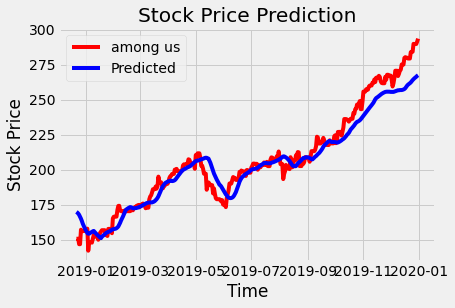

In [106]:
# Visualising the results
plt.plot(APPL_df.loc[train_size:, 'day_date'],dataset_test.values, color = 'red', label = 'among us')
plt.plot(APPL_df.loc[train_size:, 'day_date'],predicted_stock_price, color = 'blue', label = 'Predicted')
#plt.xticks(np.arange(0,test_size,50))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()